<a href="https://colab.research.google.com/github/mmestres91/game_review_NLP_sentiment_analysis_/blob/main/review_eda_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!pip install nltk
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
import plotly.express as px
from wordcloud import WordCloud

from gensim.summarization import summarize
from gensim.summarization import keywords

# Text analysis helper libraries for word frequency etc..
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation


import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import re
    
# Storing the sets of punctuation in variable result 

In [125]:
df = pd.read_csv('/content/drive/MyDrive/review_data.csv')

In [126]:
df = df[['title', 'asin', 'overall', 'brand', 'reviewText', 'summary']]

In [127]:
df.shape

(273656, 6)

In [128]:
#df.describe(include='all')
df.dtypes

title          object
asin           object
overall       float64
brand          object
reviewText     object
summary        object
dtype: object

In [129]:
df.apply(pd.to_numeric, errors="ignore").applymap(lambda x: isinstance(x, float), na_action='ignore').any()

title         False
asin          False
overall        True
brand         False
reviewText    False
summary       False
dtype: bool

In [130]:
fig = px.histogram(df, x='overall', title="Game Review Ratings")
fig.show()

In [131]:
first_dialogue = df.loc[10, "reviewText"]

res = re.sub(r'[^\w\s]', '', first_dialogue)
print(res)

4 Stars because they like it and play it often enough so dont feel like money is wasted I got them one each so they can multiplay with each other


In [134]:
nltk.download('stopwords')

stop_words = set(stopwords)
wordList = wordpunct_tokenize(res) 

wList = []

for r in wordList:
    if not r in stop_words:
      wList.append(r)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


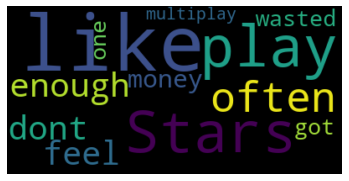

In [135]:
# # Create stopword list:
stopwords = set(stop_words)
stopwords.update(["br", "href"])
textt = " ".join(str(review) for review in df.reviewText)
textt = " ".join(wList)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [136]:
df['sentiment'] = df['overall'].apply(lambda rating : +1 if rating > 3 else (-1 if rating == 3 else 0))

df = df.loc[df["sentiment"] >= 0]
df.reset_index(inplace=True)

In [137]:
df.head()

,index,title,asin,overall,brand,reviewText,summary,sentiment
0,0,Anno 2070,0700026657,5.0,Ubisoft,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1
1,1,Anno 2070,0700026657,4.0,Ubisoft,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1
2,3,Anno 2070,0700026657,2.0,Ubisoft,"found the game a bit too complicated, not what...",Two Stars,0
3,4,Anno 2070,0700026657,5.0,Ubisoft,"great game, I love it and have played it since...",love this game,1
4,5,Anno 2070,0700026657,4.0,Ubisoft,i liked a lot some time that i haven't play a ...,Anno 2070,1


In [138]:
fig = px.histogram(df, x = 'sentiment', title= 'Aggregated Sentiment Counts')
fig.show()

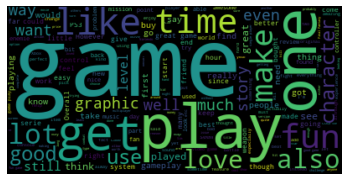

In [139]:
#Positive Sentiment WordCloud
df_pos = df[df['sentiment'] == 1]

# Create stopword list:
stopwords = set(stop_words)
stopwords.update(["br", "href", "game", "get", "play", "one", "time", "like", "fun","games", "also", "make"])

textt = " ".join(str(review) for review in df_pos.reviewText)
#textt = " ".join(wList)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

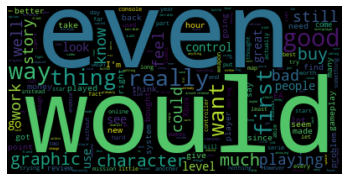

In [140]:
# #Negative Sentiment WordCloud
df_neg = df[df['sentiment'] == 0]

# # Create stopword list:
stopwords = set(stop_words)
stopwords.update(["br", "href", "game", "get", "play", "one", "time", "like", "fun","games", "also", "make"])
textt = " ".join(str(review) for review in df_neg.reviewText)
#textt = " ".join(wList)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [141]:
#Data Cleaning

df['reviewText'] = df['reviewText'].str.replace(r'[^\w\s]+', '')
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([str(word) for word in str(x).split() if word not in (stopwords)]))
df['reviewText'] = df['reviewText'].str.replace('\d+', '')
data = df[["reviewText", "sentiment"]]

<ipython-input-141-a49abbd40bcb>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-141-a49abbd40bcb>:5: FutureWarning:

The default value of regex will change from True to False in a future version.

